# Modèle de Classification detection d'anomalies

https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# nom de fichier et chemin relatif
filename = 'metrics_events_split_df.csv'
path = '../data/metrics/'
# création d'un dataframe à partir du csv de données
df = pd.read_csv(path+filename, index_col=0)
df.head(2)

,source,message,timestamp,criticality,identification,id,varnishLevelsTargetvolume,varnishLevelsTotalvolume,VarnishPrinter_3DVarnishCounter,iFoil_TotalPagesCounter
0,PLC,JV-Ti non prêt : impression impossible,2022-04-15 05:55:23.462000+00:00,INFO,391,4169749,36192.322612,100000,1792992,22881
1,iFoil,JV-Ti non prêt : impression impossible,2022-04-15 06:06:56.278000+00:00,INFO,391,4170152,36192.322612,100000,1792992,22881


In [135]:
# création d'un dictionnaire des criticité avec leur niveau
def ordinal_features_encoding(serie):
    categories_mapper = {}
    index = 1
    for catgeory in list(serie) :
        categories_mapper[catgeory] = index
        index += 1
    return categories_mapper

In [136]:
plc_df = df[df.source != 'iFoil']
plc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68556 entries, 0 to 81360
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source                           68556 non-null  object 
 1   message                          68542 non-null  object 
 2   timestamp                        68556 non-null  object 
 3   criticality                      68556 non-null  object 
 4   identification                   68556 non-null  object 
 5   id                               68556 non-null  int64  
 6   varnishLevelsTargetvolume        68556 non-null  float64
 7   varnishLevelsTotalvolume         68556 non-null  int64  
 8   VarnishPrinter_3DVarnishCounter  68556 non-null  int64  
 9   iFoil_TotalPagesCounter          68556 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 5.8+ MB


In [137]:
# suppression des colonnes inutiles
plc_df = plc_df.drop(['source', 'message'], axis=1)

In [140]:
plc_df.identification.unique()

array(['391', '330', '332', '377', '333', '334', '331', 'Kernel_Error',
       '315', '417', '406', '407', '352', '344',
       'ICB communication error', '376', '445', '325', '343', '345',
       '358', '453', '381', '354', '313', '447', '454', '387', '386',
       '372', '371', '323', '480', '311', '479', '351', '440', '324',
       '321', '0', '349', 'RCB communication error', '385', '357', '418',
       '446', '355', '389', '476', '356', '460', '472', '405', '380',
       '388', '408', '320', '329', '350', '475', '466', '416', '411',
       '346', '471', '327', '430', '444', '2', '326', '419',
       'Pilot communication error', '359', '322', '384'], dtype=object)

In [139]:
# conversion des types
plc_df["timestamp"] = pd.to_datetime(plc_df["timestamp"])
plc_df["identification"] = pd.to_numeric(plc_df["identification"])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2369, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "Kernel_Error"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\02.Pro\SIMPLON\Certification\E1\Prediction-Erreur-JetVarnish3D\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\odazo\AppData\Local\Temp\ipykernel_22876\503213786.py", line 3, in <module>
    plc_df["identification"] = pd.to_numeric(plc_df["identification"])
  File "d:\02.Pro\SIMPLON\Certification\E1\Prediction-Erreur-JetVarnish3D\.venv\lib\site-packages\pandas\core\tools\numeric.py", line 185, in to_numeric
    values, _ = lib.maybe_convert_numeric(
  File "pandas\_libs\lib.pyx", line 2411, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "Kernel_Error" at position 7

During 

In [130]:
# encodage de la colonne criticality
plc_df["criticality"] = plc_df["criticality"].replace(ordinal_features_encoding(plc_df.criticality.unique()))

In [95]:
# c_df = df[["criticality", 'timestamp']].copy()
# c_df.timestamp = pd.to_datetime(c_df.timestamp, errors='ignore', utc=True, format="%f")
# c_df.index = df["timestamp"] 
# del c_df["timestamp"]
# c_df.info()
# c_df["criticality"].plot(figsize=(15, 6))
# plt.show()


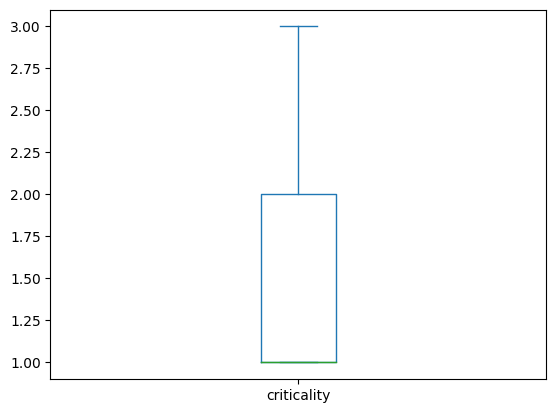

In [24]:
# Generate a Boxplot
# df1['criticality'].plot(kind='box')
# plt.show()

In [99]:
df.groupby(df.criticality).count()

,source,message,timestamp,identification,id,varnishLevelsTargetvolume,varnishLevelsTotalvolume,VarnishPrinter_3DVarnishCounter,iFoil_TotalPagesCounter
criticality,,,,,,,,,
1,59870,59854,59870,59870,59870,59870,59870,59870,59870
2,11499,11498,11499,11499,11499,11499,11499,11499,11499
3,9992,9992,9992,9992,9992,9992,9992,9992,9992


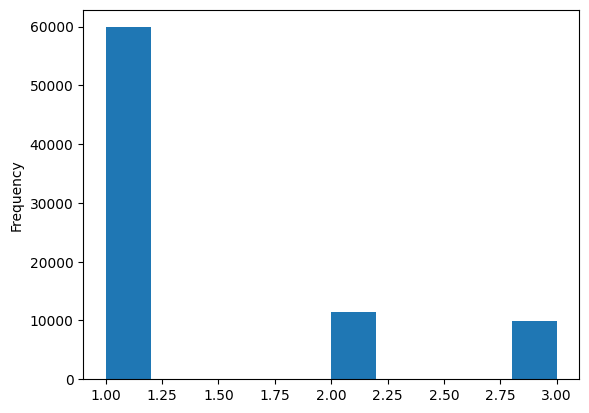

In [25]:
# Generate a Histogram plot
df['criticality'].plot(kind='hist')
plt.show()